## Tasks

#### Done
+ get the average mileage from the web

+ show on a plot how the fuel price changed within time

#### Remaing

- compute the average cost of 100 miles for each car - need to calculate first it from gallons

- compute which car is the most economic(which yearly cost is the smallest)

- predict the future prices

- based on the cars spec features, predict its mpg

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

In [2]:

class Server():
    def __init__(self, db_name):
        try:
            self.conn = sqlite3.connect(db_name)
            self.c = self.conn.cursor()
        except sqlite3.Error:
            print('Error while connecting to database')

    def execute(self, command):
        self.c.execute(command)

    def commit(self):
        self.conn.commit()

    def close(self):
        self.conn.close()

In [3]:
db = Server('database.db')

In [4]:
cars = pd.read_sql_query("SELECT mark_model, hp, weight, acc_time, range_miles ,mpg FROM Cars JOIN Spec ON Cars.id = Spec.car_id WHERE origin='US'", db.conn)
fuel_prices = pd.read_sql_query("SELECT date, price_gallon FROM Prices WHERE region = 'US';", db.conn, index_col='DATE')
fuel_prices.index = pd.to_datetime(fuel_prices.index)


display(cars.head())
display(fuel_prices.head())

,mark_model,hp,weight,acc_time,range_miles,mpg
0,chevrolet chevelle malibu,130,3504,12.0,307.0,18.0
1,buick skylark 320,165,3693,11.5,350.0,15.0
2,plymouth satellite,150,3436,11.0,318.0,18.0
3,amc rebel sst,150,3433,12.0,304.0,16.0
4,ford torino,140,3449,10.5,302.0,17.0


,price_gallon
DATE,
1990-08-31,1.2180
1990-09-30,1.2580
1990-10-31,1.3354
1990-11-30,1.3240
1990-12-31,1.3410


In [5]:
yr_91 = fuel_prices.loc['1991', 'price_gallon'].values
yr_00 = fuel_prices.loc['2000', 'price_gallon'].values
yr_19 = fuel_prices.loc['2019', 'price_gallon'].values
chg_idx = fuel_prices.loc['1991', 'price_gallon'].index.strftime('%d-%m')

chg = pd.DataFrame({'1991': yr_91,'2000':yr_00 ,'2019':yr_19}, index=chg_idx)
chg

,1991,2000,2019
31-01,1.26050,1.27880,2.14500
28-02,1.09425,1.37050,2.22250
31-03,1.04000,1.49825,2.44300
30-04,1.07620,1.43650,2.69400
31-05,1.12575,1.45640,2.73125
30-06,1.12825,1.61175,2.60125
31-07,1.09560,1.52880,2.64040
31-08,1.11475,1.43925,2.52100
30-09,1.10920,1.52525,2.48880
31-10,1.08800,1.50840,2.49725


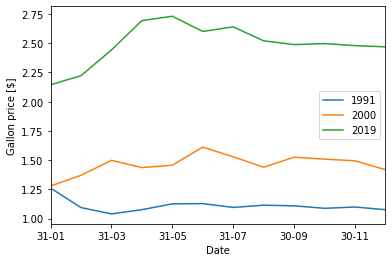

In [6]:
chg.plot()
plt.xlabel('Date')
plt.ylabel('Gallon price [$]')
plt.legend
plt.show()

In [7]:
# Change in the fuel price
print(chg['2019'] - chg['1991'])

31-01    0.88450
28-02    1.12825
31-03    1.40300
30-04    1.61780
31-05    1.60550
30-06    1.47300
31-07    1.54480
31-08    1.40625
30-09    1.37960
31-10    1.40925
30-11    1.38100
31-12    1.39300
dtype: float64


In [8]:
# Calculating the yearly percentage change
yearly_change = fuel_prices.resample('A').last().pct_change() * 100
yearly_change

,price_gallon
DATE,
1990-12-31,NaN
1991-12-31,-19.746458
1992-12-31,0.120795
1993-12-31,-5.893271
1994-12-31,4.511834
1995-12-31,0.542581
1996-12-31,15.757860
1997-12-31,-9.307605
1998-12-31,-17.508493


## Plotting the yearly price fluctuations

Text(0.5, 0, 'Year')

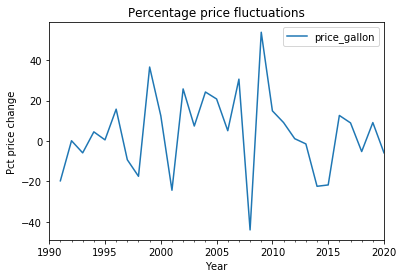

In [9]:
yearly_change.plot()

plt.title('Percentage price fluctuations')
plt.ylabel('Pct price change')
plt.xlabel('Year')

## Plotting the fuel price change over the last 20 years

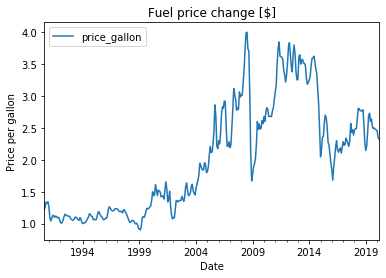

In [10]:
fuel_prices.plot()
plt.title('Fuel price change [$]')
plt.xlabel('Date')
plt.ylabel('Price per gallon')
plt.xticks(rotation=0)
plt.show()

## Getting the average mileage per year

In [11]:
from selenium import webdriver

driver = webdriver.Chrome()

driver.get('https://www.google.com/search?q=average+mileage+per+year&oq=average+mile&aqs=chrome.1.69i57j69i59.3633j0j7&sourceid=chrome&ie=UTF-8')
avg_mileage = driver.find_element_by_xpath('//*[@id="rso"]/div[1]/div/div[1]/div/div[1]/div/div[1]/div/div[1]').text.split()[0]

driver.close()

avg_mileage = int(avg_mileage.replace(',', ''))
avg_mileage

13476

In [12]:
display(cars)

,mark_model,hp,weight,acc_time,range_miles,mpg
0,chevrolet chevelle malibu,130,3504,12.0,307.0,18.0
1,buick skylark 320,165,3693,11.5,350.0,15.0
2,plymouth satellite,150,3436,11.0,318.0,18.0
3,amc rebel sst,150,3433,12.0,304.0,16.0
4,ford torino,140,3449,10.5,302.0,17.0
...,...,...,...,...,...,...
180,chevrolet camaro,90,2950,17.3,151.0,27.0
181,ford mustang gl,86,2790,15.6,140.0,27.0
182,dodge rampage,84,2295,11.6,135.0,32.0
183,ford ranger,79,2625,18.6,120.0,28.0


## Yearly cost for each car

### Computation description

### Calculations

## Feature correlations

## Predicting mpg based on the cars specifications

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [15]:
display(cars)

,mark_model,hp,weight,acc_time,range_miles,mpg
0,chevrolet chevelle malibu,130,3504,12.0,307.0,18.0
1,buick skylark 320,165,3693,11.5,350.0,15.0
2,plymouth satellite,150,3436,11.0,318.0,18.0
3,amc rebel sst,150,3433,12.0,304.0,16.0
4,ford torino,140,3449,10.5,302.0,17.0
...,...,...,...,...,...,...
180,chevrolet camaro,90,2950,17.3,151.0,27.0
181,ford mustang gl,86,2790,15.6,140.0,27.0
182,dodge rampage,84,2295,11.6,135.0,32.0
183,ford ranger,79,2625,18.6,120.0,28.0


In [40]:
X = cars.drop(['mark_model', 'mpg'], axis=1).values
y = cars['mpg'].values

In [41]:
rf = RandomForestRegressor()

rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
param_grid = {
             'max_depth': [3, 4, 5, 6],
             'n_estimators': [200, 300, 400, 500, 600], 
             'min_samples_leaf': [0.01, 0.012, 0.016]
             }

rand_cv = RandomizedSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', error_score='raise', n_jobs=-1)

rand_cv.fit(X_train, y_train)

C:\Users\Kuba\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=None, verbose

In [95]:
rand_cv.best_params_

{'n_estimators': 500, 'min_samples_leaf': 0.01, 'max_depth': 6}

In [96]:
best_model = rand_cv.best_estimator_

In [97]:
y_pred = best_model.predict(X_test)

In [99]:
(MSE(y_test, y_pred))**0.5

C:\Users\Kuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

In [100]:
y_pred

array([13.64571041, 14.17388137, 27.42770743, 17.09894587, 30.48028171,
       21.62838667, 18.12209507, 15.13169505, 25.58970817, 15.77574336,
       17.52822607, 29.62574285, 14.36117528, 23.93391015, 15.28450213,
       21.41163214, 15.81744792, 31.60333619, 18.01226005, 15.19273611,
       20.11031881, 20.99788386, 18.32996495, 20.4596656 , 14.25848607,
       18.63067204, 14.01744272, 11.53980165, 29.37536219, 14.51816352,
       13.15184997, 14.90278069, 35.27359762, 30.56140004, 24.56335   ,
       12.45962761, 18.88907211])

In [103]:
rand_cv.cv_results_

{'mean_fit_time': array([0.69076268, 1.03504848, 1.09244959, 0.39278722, 1.0311385 ,
        0.67334859, 1.0030419 , 0.60629408, 0.60362315, 0.70794312]),
 'std_fit_time': array([0.02840836, 0.06250321, 0.02015277, 0.03723664, 0.03256294,
        0.08826073, 0.01336079, 0.00428443, 0.01263472, 0.03150595]),
 'mean_score_time': array([0.03613091, 0.0665346 , 0.0907491 , 0.02604008, 0.08912349,
        0.05515448, 0.08795079, 0.04686371, 0.03875677, 0.03124269]),
 'std_score_time': array([8.14166945e-03, 5.72668901e-03, 7.93608165e-03, 7.35850259e-03,
        2.73780603e-02, 1.17244666e-02, 2.97354308e-02, 6.83651389e-07,
        1.06261197e-02, 4.05233662e-07]),
 'param_n_estimators': masked_array(data=[300, 500, 600, 200, 500, 300, 500, 300, 300, 400],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[0.016, 0.01, 0.016, 0.012, 0

## Feature importance

In [118]:
feature_names = ['hp', 'weight', 'acc_time', 'range_miles']
feature_importances = best_model.feature_importances_

importance = sorted(zip(feature_importances, feature_names), reverse=True)
importance

[(0.6124742144772519, 'range_miles'),
 (0.2204399263193544, 'weight'),
 (0.1313599489356924, 'hp'),
 (0.03572591026770117, 'acc_time')]

<BarContainer object of 4 artists>

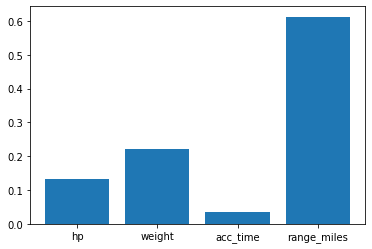

In [119]:
plt.bar(feature_names, feature_importances)

In [121]:
import eli5
from eli5.sklearn import PermutationImportance